Base de dados Kaggle: https://www.kaggle.com/laotse/credit-risk-dataset

Objetivo: Identificar o risco de crédito de cada operação

In [2]:
# Bibliotecas utilizadas

# Análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning

# Outras bibliotecas
import warnings


In [3]:
# Funções elaboradas
def identify_outlier(df):
# Função destinada a identificar quais os outliers da coluna'
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  if outliers.empty:
    print('Não há outliers na coluna selecionada')
  else:
    return outliers

In [4]:
# Leitura do arquivo csv
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [5]:
# Inspeção inicial dos dados
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
# Quantidade de linhas inicial
linha, coluna = df.shape
df.shape

(32581, 12)

In [7]:
# Entendimento do tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
# Identificação do percentual de valores nulos por coluna
# Colunas importantes: person_emp_length TEMPO DE TRABALHO e loan_int_rate TAXA DE JUROS
Nan_per = df.isnull().sum()/df.shape[0]*100
Nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

```
Dicionário de Dados
0   person_age IDADE int64 QUANTITATIVA DISCRETA
1   person_income RENDA int64 QUANTITATIVA CONTÍNUA 
2   person_home_ownership TIPO DE PROPRIEDADE DA CASA object QUALITATIVA NOMINAL
3   person_emp_length TEMPO DE TRABALHO float64 QUANTITATIVA CONTÍNUA
4   loan_intent MOTIVO DO EMPRÉSTIMO  object QUALITATIVA NOMINAL
5   loan_grade GRAU DO EMPRÉSTIMO  object QUALITATIVA ORDINAL
6   loan_amnt VALOR DO EMPRÉSTIMO int64  QUANTITATIVA DISCRETA*
7   loan_int_rate TAXA DE JUROS float64 QUANTITATIVA CONTÍNUA
8   loan_status STATUS DO EMPRÉSTIMO (0 = Adimplente 1 = Inadimplente) int64 QUALITATIVA NOMINAL
9   loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA float64 QUANTITATIVA CONTÍNUA
10  cb_person_default_on_file PADRÃO HISTÓRICO object QUALITATIVA NOMINAL
11  cb_person_cred_hist_length SCORE DE CRÉDITO int64 QUANTITATIVA DISCRETA
```

# Análise das colunas

## Person_age IDADE


---

Excluídos 5 registros > 100


---

df -> df_v2



---

A idade média dos clientes é de 27.7 e a mediana é de 26.

In [9]:
df.person_age.nunique()

58

In [10]:
df.person_age.unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [11]:
df['person_age'].min()

20

In [12]:
df[df['person_age'] > 100].shape # São 5 registros de clientes com idade acima de 100. Serão desconsiderados.

(5, 12)

In [13]:
df[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [14]:
df_v2 = df[df['person_age']<= 100]

In [15]:
df_v2.shape

(32576, 12)

In [16]:
df_v2['person_age'].describe()

count    32576.000000
mean        27.718044
std          6.204990
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

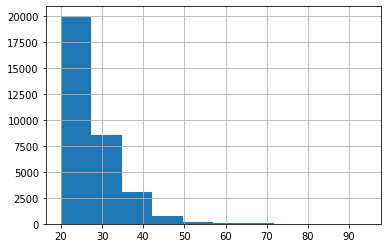

In [17]:
df_v2['person_age'].hist()

## Person_income RENDA


---


Coluna apresenta 1481 outliers, mas, em regra, serão mantidos na base de dados. Afinal, não é uma premissa do modelo ser incapaz de avaliar clientes com alta renda.


---


Especialmente o ID 32297, que apresenta o valor máximo do atributo (R$ 6.000.000), será excluído devido à idade 144, não pela renda.


---

A renda média dos clientes é de 65,882.14 e a mediana 55,000

In [18]:
df_v2['person_income'].nunique()

4294

In [19]:
df_v2['person_income'].unique()

array([  59000,    9600,   65500, ...,  720000, 1900000,    4888])

In [20]:
df_v2['person_income'].describe().round(2)

count      32576.00
mean       65882.14
std        52534.99
min         4000.00
25%        38500.00
50%        55000.00
75%        79200.00
max      2039784.00
Name: person_income, dtype: float64

In [21]:
identify_outlier(df_v2['person_income'])

15        500000
20        162500
33        306000
34        300000
42        300000
          ...   
32544     780000
32546    1900000
32551     780000
32562     160000
32579     150000
Name: person_income, Length: 1481, dtype: int64

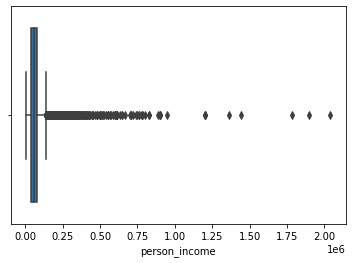

In [22]:
sns.boxplot(x='person_income', data=df_v2, fliersize=5)

In [23]:
df_v2.loc[df['person_income'] == df_v2['person_income'].max()]
#Registro já será desconsiderado devido à idade.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.0,Y,15


## Person_home_ownership TIPO DE PROPRIEDADE DA CASA


---

A maioria dos clientes mora em casa alugada (50.47) ou financiada (41.26)

In [24]:
df_v2['person_home_ownership'].nunique()

4

In [25]:
df_v2['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [26]:
df_v2_gb_ownership = df_v2.groupby('person_home_ownership')

In [27]:
df_v2_gb_ownership.size().sort_values(ascending=False)

person_home_ownership
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
dtype: int64

In [28]:
sum_df_v2_gb_ownership = df_v2_gb_ownership.size().sum()

In [29]:
100 * 16443 / sum_df_v2_gb_ownership

50.47581041257367

In [30]:
100 * 13442 / sum_df_v2_gb_ownership

41.2635068762279

## Person_emp_length TEMPO DE TRABALHO


---

Apresenta dados faltantes


---

Apresenta 2 registros de pessoas que supostamente tem tempo de serviço de 123 anos. Serão retiradas da base de dados.

---

df_v2 => df_v3

In [31]:
df_v2['person_emp_length'].nunique()

36

In [32]:
df_v2['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [33]:
df_v2['person_emp_length'].describe()

count    31681.000000
mean         4.789527
std          4.142706
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [34]:
df_v2['person_emp_length'].isnull().sum()

895

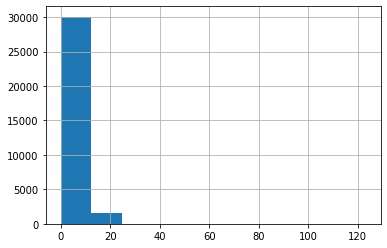

In [35]:
df_v2['person_emp_length'].hist()

In [36]:
df_v2.shape

(32576, 12)

In [37]:
df_3teste = df_v2.loc[df_v2['person_emp_length'] >= 50]

In [38]:
df_3teste.shape

(2, 12)

In [39]:
df_v3_perda = df_v2.loc[df_v2['person_emp_length'] < 50]

In [40]:
len(df_v3_perda)

31679

### Usando o df_v2, identifico que há 2 registros com tempo de trabalho acima de 50 anos, exatamente 123 anos de trabalho. Eles serão excluídos do dataset. Contudo, ao atribuir apenas os registros com tempo de serviço <= 50 anos, o dataset passa a ter -879 registros.
## Isso ocorre porque quando se filtra um campo por número, os na não são levados para o filtro.
## Utilizarei o drop para fazer a exclusão correta.

In [41]:
df_v2.loc[df_v2['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [42]:
df_v3 = df_v2.drop(index=[0,210])

In [43]:
df_v3.shape

(32574, 12)

In [44]:
df_v3['person_emp_length'].describe()

count    31679.000000
mean         4.782064
std          4.034948
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

### Tratando os NA da coluna TEMPO DE TRABALHO


---

Considerando que os NA representam 2,75% da coluna (pouco representativo), será atribuída a estes registros a mediana do tempo de serviço dos demais registros.

In [45]:
df_v3['person_emp_length'].describe()

count    31679.000000
mean         4.782064
std          4.034948
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

In [46]:
Nan_per = df_v3.isnull().sum()/df_v3.shape[0]*100
Nan_per['person_emp_length'].round(2)

2.75

In [47]:
df_v3['person_emp_length'].fillna(value=df_v3['person_emp_length'].median(), inplace=True)

In [48]:
Nan_per = df_v3.isnull().sum()/df_v3.shape[0]*100
Nan_per['person_emp_length'].round(2)

0.0

## loan_intent MOTIVO DO EMPRÉSTIMO
~20% dos empréstimos relacionados na base de dados tem a finalidade de financiar gastos com educação.

---

A base de dados conta com menos empréstimos para reforma/melhoria de casa (HOMEIMPROVEMENT). Os clientes que tomam empréstimo com este motivo solicitam valores ligeiramente maiores do que para os demais motivos.

```
MOTIVO                         %      Idade Média/Mediana  Valor do empréstimo Médio/Mediano
EDUCAÇÃO                     19.80       26.55|24	          9481.53|8000
SAÚDE                        18.64       28.00|26	          9259.58|8000
INVESTIMENTO/RISCO           17.55       27.53|26	          9580.97|8000
PESSOAL                      16.94       28.19|26	          9569.99|8000
CONSOLIDAÇÃO DE DÉBITOS      16.00       27.61|26		      9594.89|8000
REFORMA/MELHORIA DE CASA     11.07       29.07|27	         10360.52|9000
```

In [49]:
df_v3['loan_intent'].nunique()

6

In [50]:
df_v3['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [51]:
df_v3_gb_intent = df_v3.groupby("loan_intent")[['person_age', 'loan_amnt']]

In [52]:
df_v3_gb_intent_percent = df_v3_gb_intent.count().sort_values(by='loan_amnt', ascending=False)
df_v3_gb_intent_percent['%'] = df_v3_gb_intent_percent['person_age'] / df_v3_gb_intent_percent['person_age'].sum()
(100*df_v3_gb_intent_percent['%'].sort_values(ascending=False)).round(2)

loan_intent
EDUCATION            19.80
MEDICAL              18.64
VENTURE              17.55
PERSONAL             16.94
DEBTCONSOLIDATION    16.00
HOMEIMPROVEMENT      11.07
Name: %, dtype: float64

In [53]:
df_v3_gb_intent.count().sort_values(by='loan_amnt', ascending=False)

,person_age,loan_amnt
loan_intent,,
EDUCATION,6451,6451
MEDICAL,6071,6071
VENTURE,5716,5716
PERSONAL,5519,5519
DEBTCONSOLIDATION,5212,5212
HOMEIMPROVEMENT,3605,3605


In [54]:
df_v3_gb_intent.median().sort_values(by='loan_amnt', ascending=False)

,person_age,loan_amnt
loan_intent,,
HOMEIMPROVEMENT,27,9000
DEBTCONSOLIDATION,26,8000
EDUCATION,24,8000
MEDICAL,26,8000
PERSONAL,26,8000
VENTURE,26,8000


In [55]:
df_v3_gb_intent.sum().sort_values(by='loan_amnt', ascending=False).round(2)

,person_age,loan_amnt
loan_intent,,
EDUCATION,171306,61165325
MEDICAL,169976,56214925
VENTURE,157376,54764825
PERSONAL,155573,52816800
DEBTCONSOLIDATION,143884,50008550
HOMEIMPROVEMENT,104785,37349675


In [56]:
(df_v3_gb_intent.sum() / df_v3_gb_intent.count()).sort_values(by='loan_amnt', ascending=False).round(2)

,person_age,loan_amnt
loan_intent,,
HOMEIMPROVEMENT,29.07,10360.52
DEBTCONSOLIDATION,27.61,9594.89
VENTURE,27.53,9580.97
PERSONAL,28.19,9569.99
EDUCATION,26.55,9481.53
MEDICAL,28.00,9259.58


## loan_grade GRAU DO EMPRÉSTIMO


---

85% dos empréstimos registrados na base de dados concentram-se nos graus A, B e C


---

O grau C apresenta maior amplitude de idade e renda das pessoas


---

Os graus B, C e D apresentam menores rendas medianas

In [57]:
df_v3.loan_grade.nunique()

7

In [58]:
df_v3.loan_grade.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [59]:
df_v3_loan_grade_percent = df_v3.loan_grade.value_counts()

In [60]:
100 * (df_v3_loan_grade_percent / df_v3.loan_grade.count()).round(2)

A    33.0
B    32.0
C    20.0
D    11.0
E     3.0
F     1.0
G     0.0
Name: loan_grade, dtype: float64

In [61]:
df_v3.loan_grade.value_counts()

A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [62]:
df_v3_gb_grade = df_v3.groupby('loan_grade')[['person_age', 'loan_amnt', 'person_income']]

In [63]:
df_v3_gb_grade.median().round()

,person_age,loan_amnt,person_income
loan_grade,,,
A,26.0,7500.0,57600.0
B,26.0,8400.0,55000.0
C,26.0,8000.0,53000.0
D,26.0,9000.0,53800.0
E,26.0,12000.0,59328.0
F,26.0,15000.0,65000.0
G,28.0,19375.0,66900.0


In [64]:
df_v3_gb_grade.min().round()

,person_age,loan_amnt,person_income
loan_grade,,,
A,20,500,5500
B,20,500,4080
C,20,500,4000
D,20,1000,4800
E,21,1000,4200
F,21,1200,14400
G,22,1600,19200


In [65]:
df_v3_gb_grade.max().round()

,person_age,loan_amnt,person_income
loan_grade,,,
A,84,35000,1900000
B,80,35000,948000
C,94,35000,2039784
D,70,35000,703800
E,66,35000,648000
F,51,35000,499800
G,50,35000,288000


In [66]:
df_v3_gb_grade.max().round() - df_v3_gb_grade.min().round()

,person_age,loan_amnt,person_income
loan_grade,,,
A,64,34500,1894500
B,60,34500,943920
C,74,34500,2035784
D,50,34000,699000
E,45,34000,643800
F,30,33800,485400
G,28,33400,268800


In [67]:
df_v3_gb_grade_person_income = df_v3.groupby('loan_grade')['person_income']

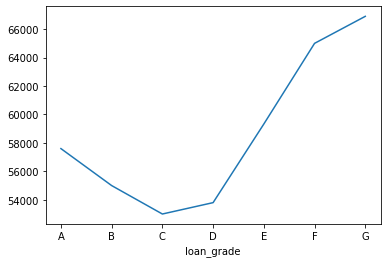

In [68]:
df_v3_gb_grade_person_income.median().plot()

In [69]:
100 * (df_v3_gb_grade.sum() / df_v3_gb_grade.count()).round(2)

,person_age,loan_amnt,person_income
loan_grade,,,
A,2766.0,853821.0,6655657.0
B,2766.0,999391.0,6633963.0
C,2776.0,921520.0,6397396.0
D,2788.0,1084258.0,6366497.0
E,2787.0,1291585.0,7087311.0
F,2835.0,1471732.0,7700873.0
G,2844.0,1719570.0,7677330.0


## loan_amnt VALOR DO EMPRÉSTIMO


---

Base de dados conta com empréstimos entre 500 e 35.000 dólares

In [70]:
df_v3.loan_amnt.nunique()

753

In [71]:
df_v3.loan_amnt.describe()

count    32574.000000
mean      9588.018051
std       6320.249598
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [72]:
df_v3_gb_amnt = df_v3.groupby('loan_intent')['loan_amnt']

In [73]:
df_v3_gb_amnt.mean()

loan_intent
DEBTCONSOLIDATION     9594.886800
EDUCATION             9481.526120
HOMEIMPROVEMENT      10360.520111
MEDICAL               9259.582441
PERSONAL              9569.994564
VENTURE               9580.970084
Name: loan_amnt, dtype: float64

## loan_int_rate TAXA DE JUROS 


---

A Taxa de juros varia conforme o Grau do empréstimo com taxa mínima de 5.42 e máxima de 23.22, sem variações significativas devido ao motivo do empréstimo.

In [74]:
df_v3.loan_int_rate.nunique()

348

In [75]:
df_v3.loan_int_rate.describe()

count    29459.000000
mean        11.011529
std          3.240497
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [76]:
df_v3_gb_rate = df_v3.groupby(by=['loan_intent', 'loan_grade'])['loan_int_rate', 'loan_amnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [77]:
df_v3_gb_rate.min().round(2)

loan_int_rate  loan_amnt
loan_intent       loan_grade                          
DEBTCONSOLIDATION A                    5.42        500
                  B                    6.00       1000
                  C                    6.00        750
                  D                    6.00       1000
                  E                   13.75       1000
                  F                   15.83       2500
                  G                   18.84       5000
EDUCATION         A                    5.42       1000
                  B                    6.00       1000
                  C                   10.28        700
                  D                   11.86       1000
                  E                   13.75       1500
                  F                   15.01       2125
                  G                   18.84       5000
HOMEIMPROVEMENT   A                    5.42       1000
                  B                    8.70        500
                  C                   10.28       1000
                  D                   11.86       1000
                  E                   13.93       1000
                  F                   15.76       2000
                  G                   17.34      12500
MEDICAL           A                    5.42        900
                  B                    6.00        950
                  C                    6.00        500
                  D                   11.86       1000
                  E                    6.00       1000
                  F                   15.01       1200
                  G                   18.84       2000
PERSONAL          A                    5.42       1000
                  B                    6.00        500
                  C                   10.28       1000
                  D                    6.00       1000
                  E                   13.75       1000
                  F                   17.58       2000
                  G                   18.84       5000
VENTURE           A                    5.42        800
                  B                    8.70       1000
                  C                   10.28       1000
                  D                   12.17       1000
                  E                   13.43       1000
                  F                   15.33       1400
                  G                   19.16       1600

In [78]:
df_v3_gb_rate.max().round(2)

loan_int_rate  loan_amnt
loan_intent       loan_grade                          
DEBTCONSOLIDATION A                    9.63      35000
                  B                   12.69      35000
                  C                   16.11      35000
                  D                   18.25      35000
                  E                   20.30      35000
                  F                   21.36      30000
                  G                   22.11      35000
EDUCATION         A                    9.63      35000
                  B                   12.69      35000
                  C                   15.96      35000
                  D                   18.25      35000
                  E                   20.20      35000
                  F                   21.74      25000
                  G                   21.21      25000
HOMEIMPROVEMENT   A                    9.63      35000
                  B                   12.69      35000
                  C                   15.96      35000
                  D                   18.25      35000
                  E                   20.30      35000
                  F                   20.25      35000
                  G                   23.22      25000
MEDICAL           A                    9.63      35000
                  B                   12.69      35000
                  C                   16.11      35000
                  D                   18.25      35000
                  E                   20.69      35000
                  F                   21.74      35000
                  G                   21.64      25000
PERSONAL          A                    9.63      35000
                  B                   12.69      35000
                  C                   15.96      35000
                  D                   18.49      35000
                  E                   19.91      35000
                  F                   21.74      25000
                  G                   20.86      25000
VENTURE           A                    9.63      35000
                  B                   12.69      35000
                  C                   16.11      35000
                  D                   18.25      35000
                  E                   19.42      35000
                  F                   22.06      30000
                  G                   22.48      20500

In [79]:
(df_v3_gb_rate.sum() / df_v3_gb_rate.count()).round(2)

loan_int_rate  loan_amnt
loan_intent       loan_grade                          
DEBTCONSOLIDATION A                    7.33    8544.07
                  B                   10.99   10143.69
                  C                   13.46    9150.22
                  D                   15.39   10717.62
                  E                   17.01   12576.04
                  F                   18.57   14670.35
                  G                   20.33   19115.00
EDUCATION         A                    7.37    8496.81
                  B                   11.00   10025.64
                  C                   13.43    8897.09
                  D                   15.31   10886.72
                  E                   17.02   12765.14
                  F                   18.40   14332.07
                  G                   20.08   18166.67
HOMEIMPROVEMENT   A                    7.26    8886.55
                  B                   10.99   10837.58
                  C                   13.44   10035.50
                  D                   15.27   11388.71
                  E                   17.24   14144.93
                  F                   18.21   16875.78
                  G                   20.17   21763.89
MEDICAL           A                    7.34    8301.01
                  B                   10.99    9474.12
                  C                   13.47    8927.59
                  D                   15.41   10630.97
                  E                   17.08   12925.90
                  F                   18.56   14355.77
                  G                   20.29   15250.00
PERSONAL          A                    7.33    8601.71
                  B                   11.00    9753.52
                  C                   13.48    9500.74
                  D                   15.37   10846.96
                  E                   16.99   12553.74
                  F                   19.25   14752.50
                  G                   19.89   19535.00
VENTURE           A                    7.31    8556.77
                  B                   11.01   10117.45
                  C                   13.50    9199.09
                  D                   15.40   10698.75
                  E                   16.78   12649.58
                  F                   18.78   13886.18
                  G                   20.66   12260.71

## loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA


---

Minimo: ~0% | Máximo: 83%


---

CONFIRMADO. Teste para confirmar que o % de empréstimo sobre a renda pode ser calculado pela divisão entre as colunas loan_amnt / person_income




In [80]:
df_v3.loan_percent_income.nunique()

77

In [81]:
df_v3.loan_percent_income.describe().round(9)

count    32574.000000
mean         0.170202
std          0.106755
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [82]:
df_test_percent = df_v3.loc[df_v3['loan_percent_income'] == 0.0,['loan_amnt', 'person_income', 'loan_percent_income']]

In [83]:
df_test_percent_min = df_v3.loc[df_v3['loan_percent_income'] == 0.0,['loan_amnt', 'person_income', 'loan_percent_income']]

In [84]:
df_test_percent_max = df_v3.loc[df_v3['loan_percent_income'] > 0.7,['loan_amnt', 'person_income', 'loan_percent_income']]

In [85]:
df_test_percent_concat = pd.concat([df_test_percent_min, df_test_percent_max])

In [86]:
df_test_percent_concat

,loan_amnt,person_income,loan_percent_income
17834,2000,948000,0.00
18917,1800,510000,0.00
27877,2500,522000,0.00
30049,8450,2039784,0.00
31916,1000,780000,0.00
31922,6600,1362000,0.00
31924,6400,1440000,0.00
32546,1500,1900000,0.00
460,13000,18000,0.72
571,15000,19500,0.77


In [87]:
df_test_percent_concat['test_column'] = (df_test_percent_concat['loan_amnt'] / df_test_percent_concat['person_income']).round(2)

In [88]:
df_test_percent_concat

,loan_amnt,person_income,loan_percent_income,test_column
17834,2000,948000,0.00,0.00
18917,1800,510000,0.00,0.00
27877,2500,522000,0.00,0.00
30049,8450,2039784,0.00,0.00
31916,1000,780000,0.00,0.00
31922,6600,1362000,0.00,0.00
31924,6400,1440000,0.00,0.00
32546,1500,1900000,0.00,0.00
460,13000,18000,0.72,0.72
571,15000,19500,0.77,0.77


## loan_status STATUS DO EMPRÉSTIMO


---

(0 is non default 1 is default) (default = Inadimplente)


---


0: 25467 registros | 1: 7107 registros

In [89]:
df_v3.loan_status.nunique()

2

In [90]:
df_v3.loan_status.unique()

array([0, 1])

In [91]:
df_v3.loan_status.value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

In [92]:
df_v3_gb_loan_status_grade = df_v3.groupby(by=['loan_grade', 'loan_status'])['person_age']

In [93]:
linhas_v3, cols_v3 = df_v3.shape

In [94]:
100 * (df_v3_gb_loan_status_grade.count() / linhas_v3).round(5)

loan_grade  loan_status
A           0              29.788
            1               3.294
B           0              26.853
            1               5.222
C           0              15.709
            1               4.111
D           0               4.559
            1               6.570
E           0               1.053
            1               1.906
F           0               0.218
            1               0.522
G           0               0.003
            1               0.193
Name: person_age, dtype: float64

In [95]:
df_v3_gb_loan_status_tax = df_v3.groupby('loan_grade')['loan_int_rate']

In [96]:
df_v3_gb_loan_status_tax.count()

loan_grade
A    9773
B    9393
C    5826
D    3313
E     881
F     214
G      59
Name: loan_int_rate, dtype: int64

## cb_person_cred_hist_length SCORE DE CRÉDITO


---
Mín: 2 | Máx: 30

In [97]:
df_v3['cb_person_cred_hist_length'].nunique()

29

In [98]:
df_v3['cb_person_cred_hist_length'].unique()

array([ 2,  3,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 28,
       27, 22, 19, 29, 23, 26, 20, 21, 30, 25, 24, 18])

In [99]:
df_v3['cb_person_cred_hist_length'].describe()

count    32574.000000
mean         5.804108
std          4.053873
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [100]:
df_v3['cb_person_cred_hist_length'].value_counts()

2     5964
3     5940
4     5923
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
30      22
23      22
22      22
27      22
19      21
21      20
18      19
25      17
26      16
29      14
Name: cb_person_cred_hist_length, dtype: int64

## cb_person_default_on_file PADRÃO HISTÓRICO


---

N: 26830 | Y: 5744

In [101]:
df_v3['cb_person_default_on_file'].nunique()

2

In [102]:
df_v3['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [103]:
df_v3['cb_person_default_on_file'].value_counts()

N    26830
Y     5744
Name: cb_person_default_on_file, dtype: int64

# Separar df sem dados faltantes e apenas com dados faltantes e retirar duplicatas


---

df_3 -> df_4 (sem duplicatas e valores nulos)

In [104]:
df_v3.shape 

(32574, 12)

In [105]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [106]:
df_v4 = df_v3.drop_duplicates()

In [107]:
df_v4.shape # 165 duplicatas

(32409, 12)

In [108]:
df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32409 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32409 non-null  int64  
 1   person_income               32409 non-null  int64  
 2   person_home_ownership       32409 non-null  object 
 3   person_emp_length           32409 non-null  float64
 4   loan_intent                 32409 non-null  object 
 5   loan_grade                  32409 non-null  object 
 6   loan_amnt                   32409 non-null  int64  
 7   loan_int_rate               29315 non-null  float64
 8   loan_status                 32409 non-null  int64  
 9   loan_percent_income         32409 non-null  float64
 10  cb_person_default_on_file   32409 non-null  object 
 11  cb_person_cred_hist_length  32409 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [109]:
df_v4.dropna(how='any', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
linhas, colunas = df_v4.shape
df_v4.shape # 3.094 valores faltantes (taxa de juros)

(29315, 12)

# Analisando os dados faltantes em busca de um padrão. Há predominância de dados faltantes em algum subgrupo do dataset? df_v3

---

person_home_ownership   
loan_intent   
loan_grade   
loan_status   
cb_person_default_on_file   
cb_person_cred_hist_length   


---

Verificar se há relação entre: Status empréstimo e taxa de juros NAN / loan_grade e taxa de juros NAN / cb_person_default_on_file e taxa de juros NAN

Os valores nulos da taxa de juros apresentam concentração nas seguintes features:



In [111]:
df_v3['loan_int_rate_nan'] = df_v3['loan_int_rate'].isnull()

In [112]:
df_v3.loc[df_v3['loan_int_rate_nan'] == 1]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate_nan
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4,True
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4,True
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4,True
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3,True
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28,True
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19,True
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28,True
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23,True


In [113]:
df_v3_gb_status_emp_int_rate_null = df_v3.groupby('loan_status')['loan_int_rate_nan']

In [114]:
100*(df_v3_gb_status_emp_int_rate_null.sum() / linha).round(2)

loan_status
0    8.0
1    2.0
Name: loan_int_rate_nan, dtype: float64

In [115]:
df_v3_gb_grade_int_rate_null = df_v3.groupby('loan_grade')['loan_int_rate_nan']

In [116]:
100*(df_v3_gb_grade_int_rate_null.sum() / linha).round(2)

loan_grade
A    3.0
B    3.0
C    2.0
D    1.0
E    0.0
F    0.0
G    0.0
Name: loan_int_rate_nan, dtype: float64

In [117]:
df_v3_gb_cb_default_int_rate_null = df_v3.groupby('cb_person_default_on_file')['loan_int_rate_nan']

In [118]:
100*(df_v3_gb_cb_default_int_rate_null.sum() / linha).round(2)

cb_person_default_on_file
N    8.0
Y    2.0
Name: loan_int_rate_nan, dtype: float64

In [119]:
df_v3_gb_motivo_int_rate_null = df_v3.groupby('loan_intent')['loan_int_rate_nan']

In [120]:
100*(df_v3_gb_motivo_int_rate_null.sum() / linha).round(2)

loan_intent
DEBTCONSOLIDATION    2.0
EDUCATION            2.0
HOMEIMPROVEMENT      1.0
MEDICAL              2.0
PERSONAL             2.0
VENTURE              2.0
Name: loan_int_rate_nan, dtype: float64

In [121]:
# linhasFaltantes, colsFaltantes = df_vFaltantes.shape
# df_vFaltantes.shape

# Análise dos Outliers (restantes). Já retirados os registros com IDADE > 100 e TEMPO DE EMPREGO > 100


---

df_v4: person_income RENDA e loan_amnt VALOR DO EMPRÉSTIMO

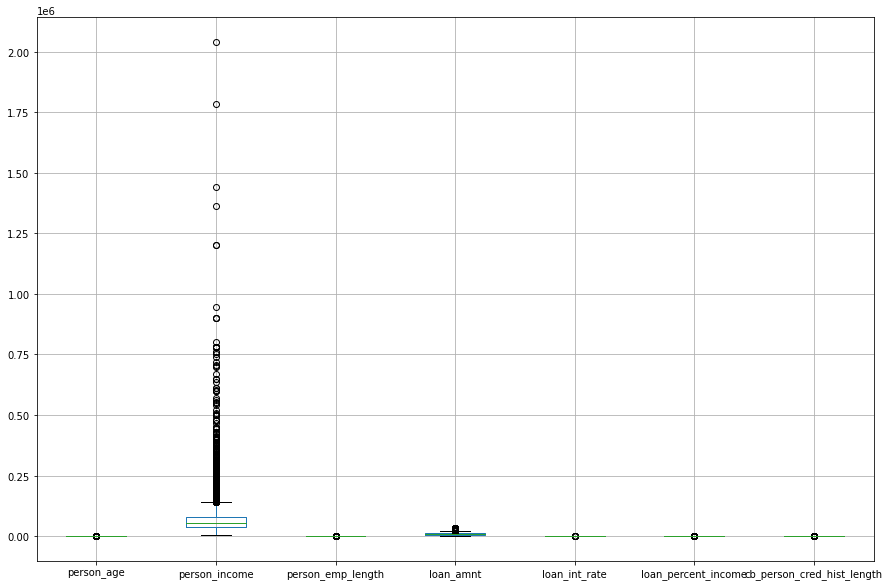

In [122]:
# Geral
plt.figure(figsize=(15,10))
df_v4.boxplot(column=['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])

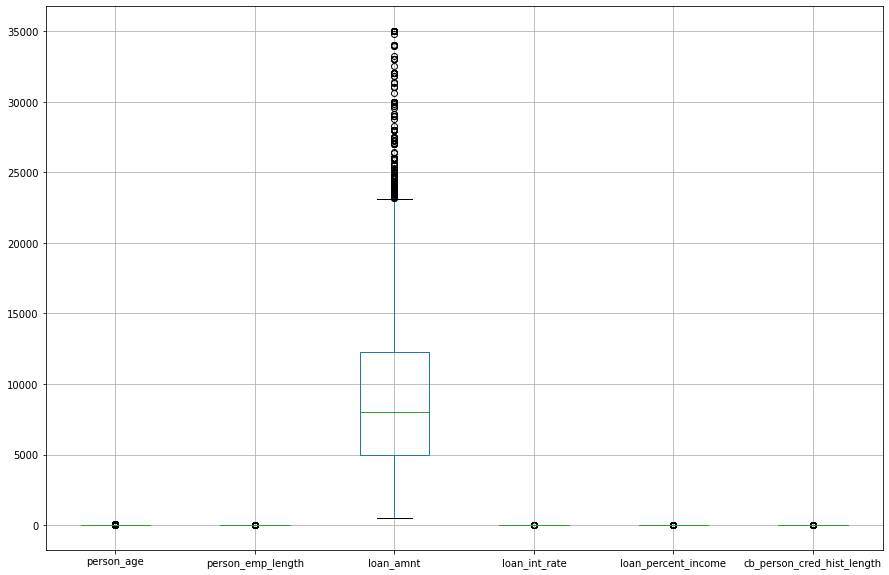

In [123]:
# Sem coluna person_income
plt.figure(figsize=(15,10))
df_v4.boxplot(column=['person_age', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])

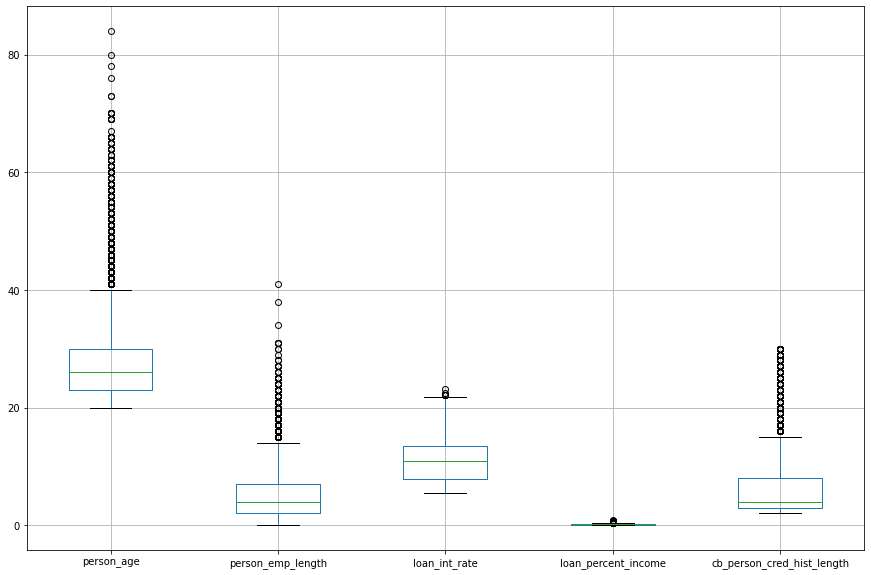

In [124]:
# Sem colunas person_income e loan_amnt
plt.figure(figsize=(15,10))
df_v4.boxplot(column=['person_age', 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])

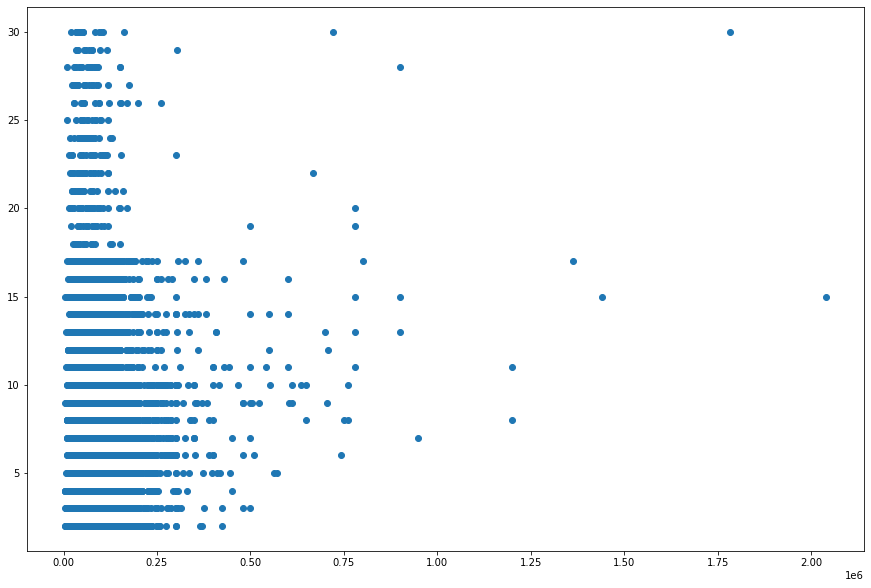

In [125]:
# Gráfico de Dispersão plt
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['person_income'], y=df_v4['cb_person_cred_hist_length'])

# Correlação
df_v4 (sem valores nulos)


---


Histórico de Crédito bem correlacionado com a idade.

In [126]:
correlacao = df_v4.corr()

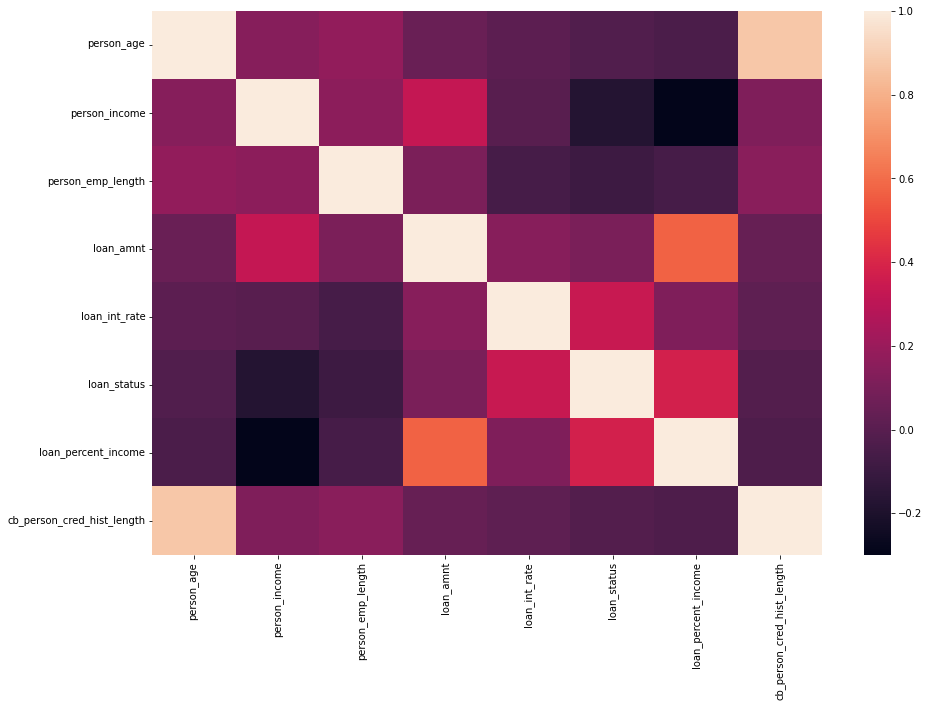

In [127]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacao)

In [128]:
correlacao

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.140372,0.173894,0.055755,0.011129,-0.021770,-0.040446,0.877517
person_income,0.140372,1.000000,0.161208,0.326803,-0.001019,-0.172188,-0.298871,0.121197
person_emp_length,0.173894,0.161208,1.000000,0.109340,-0.055771,-0.086346,-0.059947,0.150020
loan_amnt,0.055755,0.326803,0.109340,1.000000,0.146926,0.106920,0.572818,0.045513
loan_int_rate,0.011129,-0.001019,-0.055771,0.146926,1.000000,0.335812,0.120111,0.015855
loan_status,-0.021770,-0.172188,-0.086346,0.106920,0.335812,1.000000,0.379390,-0.015046
loan_percent_income,-0.040446,-0.298871,-0.059947,0.572818,0.120111,0.379390,1.000000,-0.030017
cb_person_cred_hist_length,0.877517,0.121197,0.150020,0.045513,0.015855,-0.015046,-0.030017,1.000000


# Análise dos registros inadimplentes
_em andamento_

In [129]:
df_dft = df_v4.groupby('loan_status').get_group(0)

In [130]:
df_dft.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4


In [131]:
correlacao_dft = df_dft.corr()

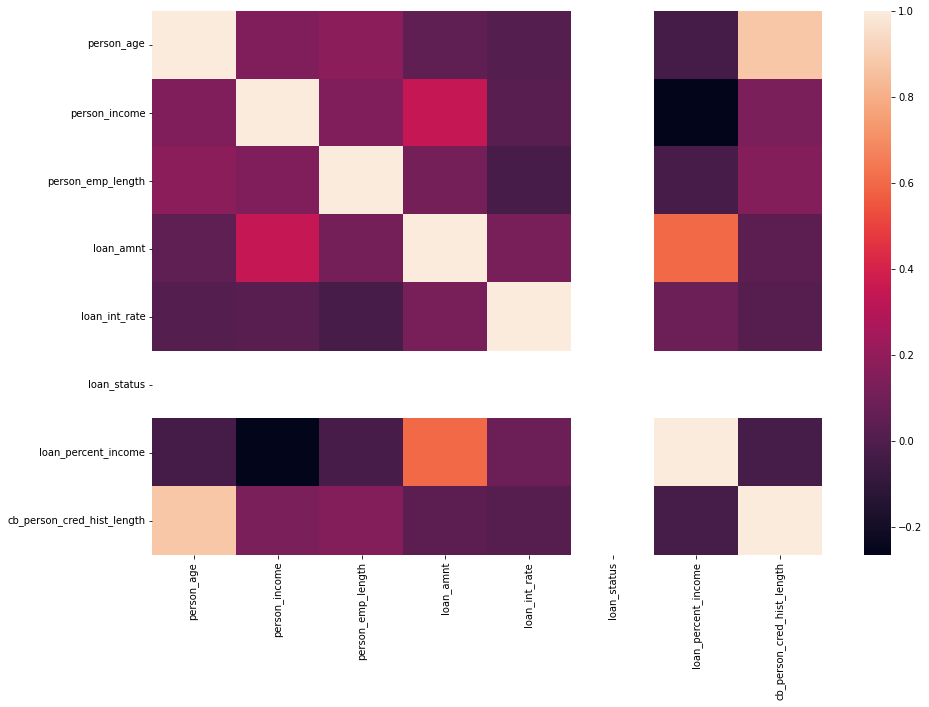

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacao_dft)

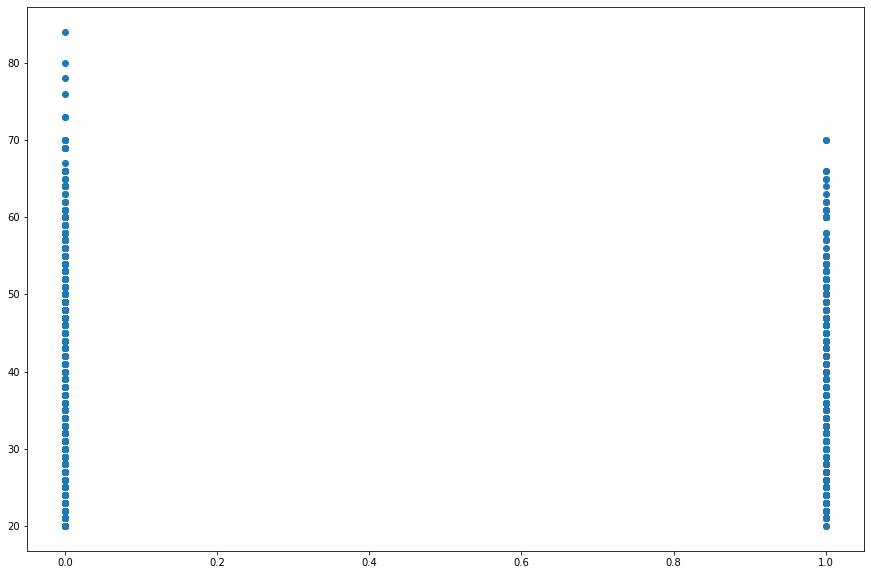

In [133]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['loan_status'], y=df_v4['person_age'])

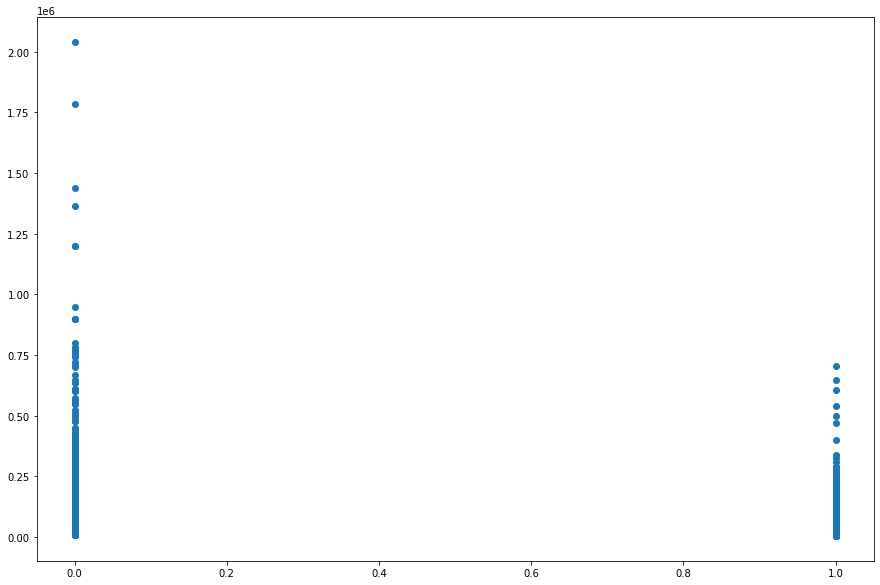

In [134]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['loan_status'], y=df_v4['person_income'])

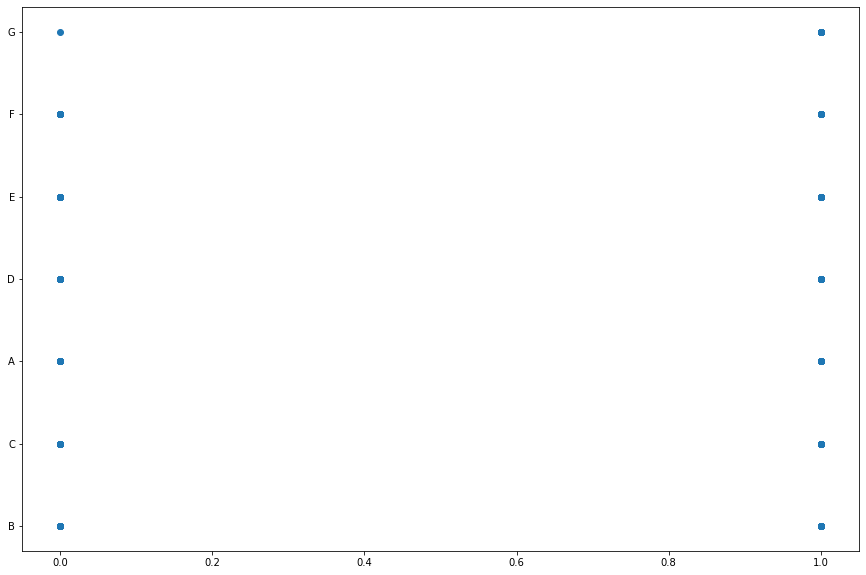

In [135]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['loan_status'], y=df_v4['loan_grade'])

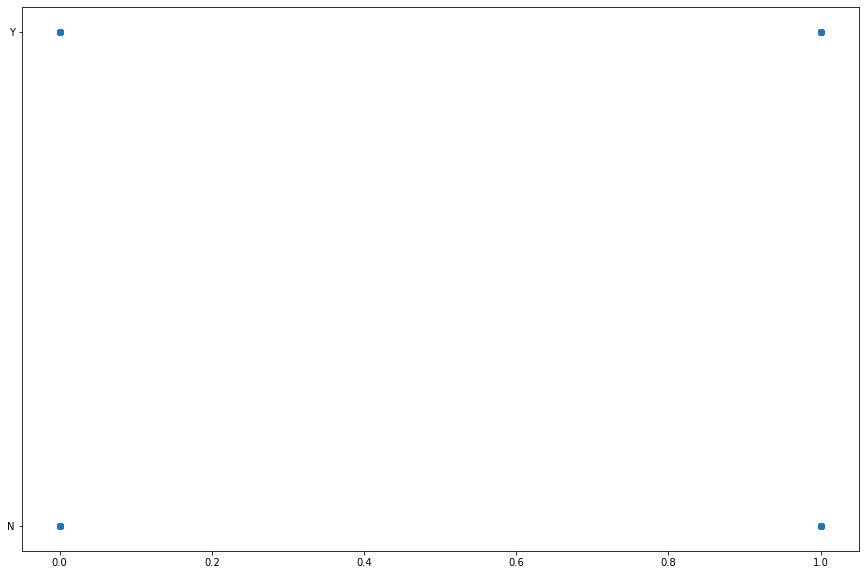

In [136]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['loan_status'], y=df_v4['cb_person_default_on_file'])

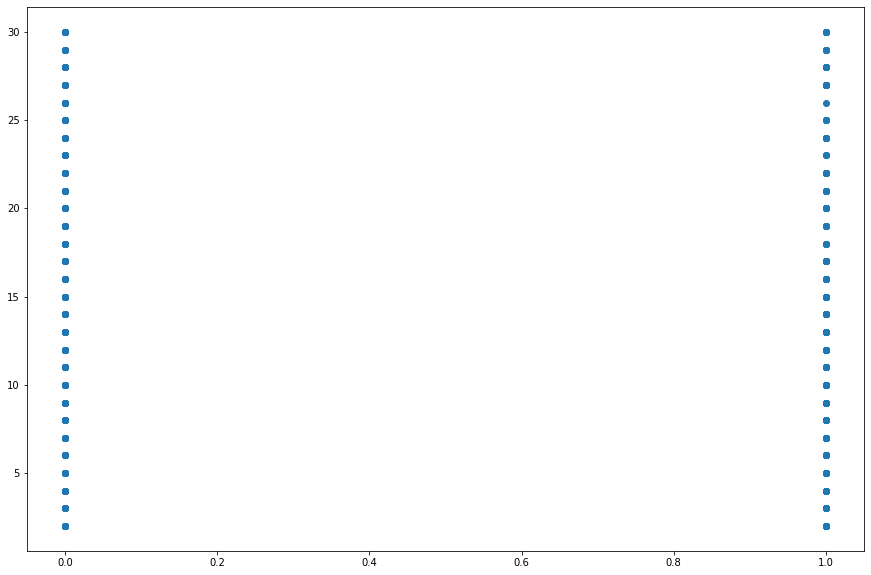

In [137]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['loan_status'], y=df_v4['cb_person_cred_hist_length'])

In [138]:
lin_default = df_v4['loan_status'].value_counts()[0]
lin_default


22868

In [139]:
lin_notdefault = df_v4['loan_status'].value_counts()[1]
lin_notdefault

6447

In [140]:
lin_notdefault


6447

In [141]:
gb_inadimpl_hm = df_v4.groupby(['person_home_ownership', 'loan_status'], as_index=False)['person_age'].agg('count')

In [142]:
gb_inadimpl_hm

,person_home_ownership,loan_status,person_age
0,MORTGAGE,0,10514
1,MORTGAGE,1,1537
2,OTHER,0,66
3,OTHER,1,27
4,OWN,0,2168
5,OWN,1,168
6,RENT,0,10120
7,RENT,1,4715


In [143]:
gb_inadimpl_hm['linhas_total'] = ''

In [144]:
gb_inadimpl_hm

,person_home_ownership,loan_status,person_age,linhas_total
0,MORTGAGE,0,10514,
1,MORTGAGE,1,1537,
2,OTHER,0,66,
3,OTHER,1,27,
4,OWN,0,2168,
5,OWN,1,168,
6,RENT,0,10120,
7,RENT,1,4715,


In [145]:
gb_inadimpl_hm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   person_home_ownership  8 non-null      object
 1   loan_status            8 non-null      int64 
 2   person_age             8 non-null      int64 
 3   linhas_total           8 non-null      object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes


In [146]:
for i in gb_inadimpl_hm['loan_status']:
  print(i)

0
1
0
1
0
1
0
1


In [147]:
warnings.filterwarnings("ignore")

In [148]:
for n, i in enumerate(gb_inadimpl_hm['loan_status']):
  if i == 0:
      gb_inadimpl_hm['linhas_total'][n] = lin_default
  else:
      gb_inadimpl_hm['linhas_total'][n] = lin_notdefault
  n+=1

In [149]:
gb_inadimpl_hm

,person_home_ownership,loan_status,person_age,linhas_total
0,MORTGAGE,0,10514,22868
1,MORTGAGE,1,1537,6447
2,OTHER,0,66,22868
3,OTHER,1,27,6447
4,OWN,0,2168,22868
5,OWN,1,168,6447
6,RENT,0,10120,22868
7,RENT,1,4715,6447


In [163]:
gb_inadimpl_hm['%'] = 100*gb_inadimpl_hm['person_age'] / gb_inadimpl_hm['linhas_total']

In [170]:
gb_inadimpl_hm

,person_home_ownership,loan_status,person_age,linhas_total,%
0,MORTGAGE,0,10514,22868,45.9769
1,MORTGAGE,1,1537,6447,23.8405
2,OTHER,0,66,22868,0.288613
3,OTHER,1,27,6447,0.418799
4,OWN,0,2168,22868,9.4805
5,OWN,1,168,6447,2.60586
6,RENT,0,10120,22868,44.254
7,RENT,1,4715,6447,73.1348
